In todays highly complicated market retailing the customer is more important than ever in this presentation we will discuss strategies they can use to reduce the customer chart 


# Telco churn classification final project

Project Overview and Summary

# Project Description

This project seeks to understand why TELCO customers leave and find ways to keep them loyal by uncovering key reasons for churn

# Project Goals

The main aims of this project were to:

- Find important reasons for customer churn
- Create a reliable model to predict it.
- Share the results with TELCO's  decision-makers.


# Summary Report

After thorough study, we picked four features that stood out visually and were important according to the chi-square tests. The Logistic Regression model was the top choice for predicting customer churn. It consistently predicted with almost 80% accuracy in all stages—train, validate, and test—outperforming the basleline accuracy of 74%.

The insights from this study will help TELCO understand why customers leave, so they can make plans to prevent it and improve customer loyalty.

# Initial Questions
The project aimed to find answers to these initial questions:

1. Does Contract type affects customer churn significantly?
2. Device protection relates to customer churn significantly?
3. Does Streaming TV affects customer churn significantly?
4. Does Having tech support has a significant impact on customer churn?


In [3]:
# import python libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import wrangle functions
from env import get_connection
import acquire
import prepare

In [5]:
# import Machine Learning for classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


# DATA ACQUISITION

In [6]:
# DEFINED an acquire function by creating SQL query and joining tables
telco_df = acquire.get_telco_data('telco_churn')

In [12]:
# DEFINED Data_acuire function that displays methods to view the acquired data e.g., shape, describe, info
#data_acquire = acquire.telco_data_acquire(telco_df)

In [13]:
columns_to_drop = ['phone_service.1', 'multiple_lines.1', 'online_security.1', 'online_backup.1', 'device_protection.1', 'tech_support.1', 'streaming_tv.1', 'streaming_movies.1', 'total_charges.1', 'paperless_billing.1']
telco_df = telco_df.drop(columns=columns_to_drop)


In [2]:
#initial exploration of acquired data
#data_acquire = acquire.telco_data_acquire(telco_df)

# DATA PREPARATION

In [15]:
# DEFINED a preparation function that Dropped columns 'internet_service_type_id','contract_type_id','payment_type_id', 'Unnamed: 0' and created and created dummy columns
prepare_telco=prepare.prep_telco(telco_df)
prepare_telco

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,contract_type,phone_service.1,multiple_lines.1,internet_service_type_id.1,online_security.1,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,internet_service_type_Fiber optic,gender_Male,contract_type,contract_type_Yes
0,0002-ORFBO,0,9,65.60,593.30,One year,Yes,No,1,No,...,0,1,0,0,1,0,0,0,One year,1
1,0003-MKNFE,0,9,59.90,542.40,Month-to-month,Yes,Yes,1,No,...,0,0,0,1,0,0,0,1,Month-to-month,0
2,0004-TLHLJ,0,4,73.90,280.85,Month-to-month,Yes,No,2,No,...,0,0,0,0,1,1,1,1,Month-to-month,0
3,0011-IGKFF,1,13,98.00,1237.85,Month-to-month,Yes,No,2,No,...,0,1,0,1,1,1,1,1,Month-to-month,0
4,0013-EXCHZ,1,3,83.90,267.40,Month-to-month,Yes,No,2,No,...,0,1,0,0,1,1,1,0,Month-to-month,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9282-IZGQK,0,1,85.00,85.00,Month-to-month,Yes,Yes,2,No,...,0,0,0,1,1,1,1,0,Month-to-month,0
7039,9462-MJUAW,0,4,50.40,206.60,Month-to-month,Yes,Yes,1,No,...,0,0,0,0,0,1,0,1,Month-to-month,0
7040,9705-ZJBCG,0,13,54.15,701.05,One year,Yes,No,1,Yes,...,0,0,0,0,0,0,0,0,One year,1
7041,9777-IQHWP,0,64,93.40,5822.30,Two year,Yes,Yes,2,Yes,...,0,0,0,1,0,0,1,1,Two year,1


In [17]:
# DEFINED a split data function to divide the original data into 3 datasets to train, validate and test
telco_train,telco_validate,telco_test=prepare.split_telco(prepare_telco)
print(f'train data shape: {telco_train.shape}')
print(f'validate data shape: {telco_validate.shape}')
print(f'test data shape: {telco_test.shape}')

train data shape: (4225, 44)
validate data shape: (1409, 44)
test data shape: (1409, 44)


# DATA EXPLORATORY & ANALYSIS
# Exploring through Visualizations

In [20]:
non_numeric_columns = []

for column in telco_train.columns:
    if not pd.api.types.is_numeric_dtype(telco_train[column]):
        non_numeric_columns.append(column)

print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['customer_id', 'contract_type', 'phone_service.1', 'multiple_lines.1', 'online_security.1', 'online_backup.1', 'device_protection.1', 'tech_support.1', 'streaming_tv.1', 'streaming_movies.1', 'total_charges.1', 'paperless_billing.1', 'signup_date', 'contract_type']


In [21]:
non_numeric_columns = ['customer_id', 'contract_type', 'phone_service.1', 'multiple_lines.1', 'online_security.1', 'online_backup.1', 'device_protection.1', 'tech_support.1', 'streaming_tv.1', 'streaming_movies.1', 'total_charges.1', 'paperless_billing.1', 'signup_date', 'contract_type']
numeric_columns = telco_train.columns.difference(non_numeric_columns)
numeric_df = telco_train[numeric_columns]


The provided code is about exploring and visualizing the correlation among numeric features in your dataset, specifically with respect to the "churn" target variable.

In [1]:
# correlation data
#telco_correlation = numeric_df.corr()
#Explore correlation data by churn
#telco_correlation_churn = telco_correlation['churn_Yes'].sort_values(ascending=False)
#telco_correlation_churn
#sns.clustermap(numeric_df.corr(), cmap = 'Blues', center = 0, annot = False)
#plt.show()
# cluster map becasue This grouping helps reveal clusters of variables that exhibit similar patterns of correlation
# a cluster map makes it easier to spot patterns. Strong positive or negative correlations between variables.

In [29]:
# CONTRACT TYPE HISTOGRAM ( USING COUNTPLOT)

# 1. Does Contract type affects customer churn significantly?


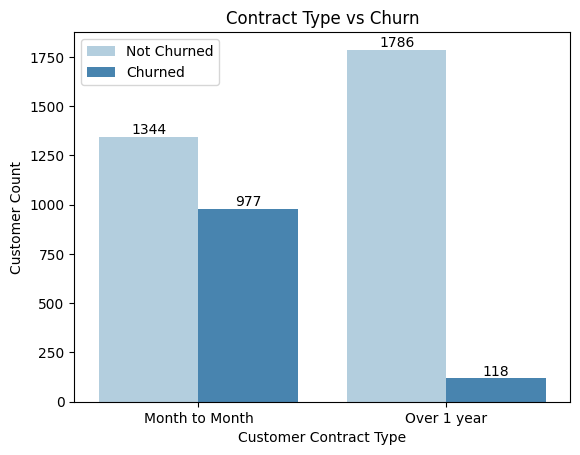

In [26]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['Month to Month', 'Over 1 year']

# Visualizing the streaming TV vs churn
ct = sns.countplot(data=telco_train, x='contract_type_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = ct.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

# Relabel the x-axis ticks
plt.xticks(range(len(x)), x)

ct.set_xlabel('Customer Contract Type')
ct.set_ylabel('Customer Count')
plt.title('Contract Type vs Churn')

plt.xticks(range(len(x)), x)

# Add count numbers on bars
for p in ct.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    ct.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()
# visualzieand analyze the relationship between customer contract type and customer churn

In [27]:
telco_train.churn_Yes.value_counts()

churn_Yes
0    3130
1    1095
Name: count, dtype: int64

In [28]:
#'0' relabled to Month-to-Month (MTM) and '1' relabeld to Over 1 Year 
telco_train.contract_type_Yes.value_counts()


contract_type_Yes
0    2321
1    1904
Name: count, dtype: int64

Contract Type Visual Findings

The visual data shows that customers that the contract type has a significant impacy on the rate of churn. The longer the contract the less customers churn.

In [30]:
# DEVICE PROTECTION HISTOGRAM (USING COUNTPLOT)

# 2. Device protection relates to customer churn significantly?



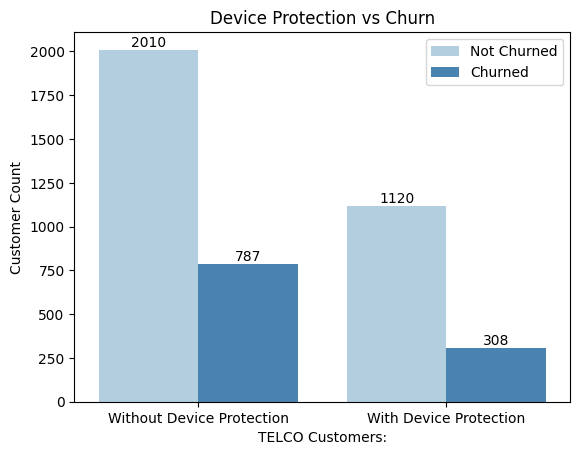

In [31]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['Without Device Protection', 'With Device Protection']

# Visualizing the streaming TV vs churn
dp = sns.countplot(data=telco_train, x='device_protection_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = dp.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)

dp.set_xlabel('TELCO Customers:')
dp.set_ylabel('Customer Count')
plt.title('Device Protection vs Churn')

# Add count numbers on bars
for p in dp.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    dp.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [32]:
#'0' relabled to Without Device Protection and with Device Protection 
telco_train.device_protection_Yes.value_counts()


device_protection_Yes
0    2797
1    1428
Name: count, dtype: int64

Device Protection Visual Findings

The visual data shows that customers with Device Protection churn less than those that do not have Device Protection.


In [33]:
# STREAMING TV HISTOGRAM (USING COUNTPLOT)

# Does Streaming TV affects customer churn significantly?

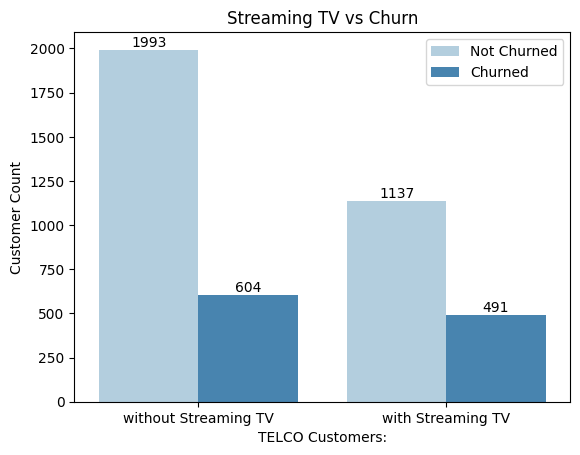

In [34]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = ['without Streaming TV', 'with Streaming TV']

# Visualizing the streaming TV vs churn
st = sns.countplot(data=telco_train, x='streaming_tv_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = st.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)

st.set_xlabel('TELCO Customers:')
st.set_ylabel('Customer Count')
plt.title('Streaming TV vs Churn')

# Add count numbers on bars
for p in st.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    offset = width * 0.02  # Adjust the offset percentage as needed
    st.annotate(format(height, '.0f'), (x + width / 2., y + height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


In [35]:
#'0' relabled to Without Streaming TV and '1'with Streaming TV 
telco_train.streaming_tv_Yes.value_counts()

streaming_tv_Yes
0    2597
1    1628
Name: count, dtype: int64

Streaming TV Visual Findings


The visual data shows that customers that Stream Tv churn slightly less than those that do not Stream TV.

In [36]:
# TECH SUPPORT HISTOGRAM (USING COUNTPLOT)

In [87]:
# 4. Does Having tech support has a significant impact on customer churn?


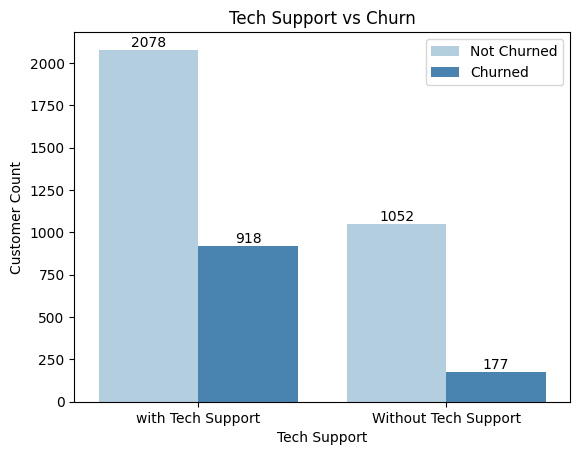

In [37]:
new_labels = {'not churn': 'Not Churned', 'churned': 'Churned'}
x = {'with Tech Support', 'Without Tech Support'}
ts = sns.countplot(data=telco_train, x='tech_support_Yes', hue='churn_Yes', palette='Blues')

# Access the legend object
legend = ts.legend()

# Modify the legend labels
legend.get_texts()[0].set_text(new_labels['not churn'])
legend.get_texts()[1].set_text(new_labels['churned'])

plt.xticks(range(len(x)), x)


ts.set_xlabel('Tech Support')
ts.set_ylabel('Customer Count')
plt.title('Tech Support vs Churn')

# Add count numbers on bars
for p in ts.patches:
    ts.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

In [38]:
#'0' relabled to Without Tech Support and '1'with Tech Support
telco_train.tech_support_Yes.value_counts()

tech_support_Yes
0    2996
1    1229
Name: count, dtype: int64

Tech Support Visual Findings

The correlation data for tech_support_Yes vs churn: -0.161989 indicates a weak negative correlation between two variables.

The visual data shows that customers with tech support churn significantly less than those that do not have Tech Support.

# Exploring through Visualizations Findings
Upon analyzing the correlation data and conducting data visualizations, it was observed that certain features exhibited a weak negative correlation with churn. As a result, streaming TV and data protection were excluded from further examination. However, Contract type and Tech Support features displayed visual significance and demonstrated a more substantial relationship with customer churn. Therefore, these features were selected for chi-square statistical testing.

chi-square test is used to assess the independence or association between two categorical variables. It is particularly useful when analyzing categorical data or count data.



# 1. Statistical Testing - Contract Type

Contract Type Hypothesis:

• a = .05 

• H0 = Contract type is independent of customer churn 

• Ha = Contract type is dependent to customer churn  

Chi-square test using 2 discrete independent variables Contract Type vs Churn.


In [52]:
a = 0.05
ct_observed = pd.crosstab(telco_train.contract_type_Yes, telco_train.churn_Yes)
ct_observed



churn_Yes,0,1
contract_type_Yes,,
0,1344,977
1,1786,118


Chi-square statistic: 295.06792155327156
p-value: 3.9114197569697555e-66
Degrees of freedom: 1
Expected frequencies: [[3559.67920731  744.32079269]
 [1782.32079269  372.67920731]]


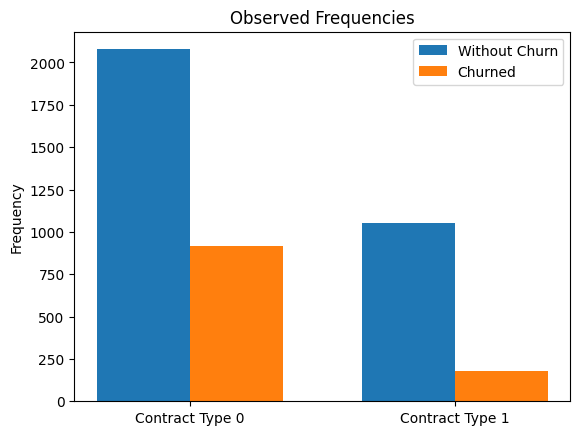

In [65]:
# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(ct_observed1)

# Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Plot the observed frequencies as a grouped bar plot
labels = ['Contract Type 0', 'Contract Type 1']
x = np.arange(dt_observed1.shape[0])
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, dt_observed1[:, 0], width, label='Without Churn')
bars2 = ax.bar(x + width/2, dt_observed1[:, 1], width, label='Churned')

ax.set_ylabel('Frequency')
ax.set_title('Observed Frequencies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [54]:
print(f'The p-value is less than the alpha: {p < a}')

if p < a:
    print('Outcome: We reject the null')
else:
    print("Outcome: We fail to reject the null")
    

The p-value is less than the alpha: True
Outcome: We reject the null


Contract Type Statistical Findings

- Outcome: We rejected the Null Hypothesis, indicating that contract type is dependent on customer churn.


# 2. Statistical Testing - Tech Support

Tech Support Hypothesis:


H0 = Tech support is independent of customer churn

Ha = Tech support is dependent to customer churn

Chi-square test using 2 discrete independent variables Tech Support vs Churn.


In [55]:
dt_observed = pd.crosstab(telco_train.tech_support_Yes, telco_train.churn_Yes)
dt_observed

churn_Yes,0,1
tech_support_Yes,,
0,2078,918
1,1052,177


Chi-square statistic: 118.850516784955
p-value: 1.1292691053793043e-27
Degrees of freedom: 1
Expected frequencies: [[2219.52189349  776.47810651]
 [ 910.47810651  318.52189349]]


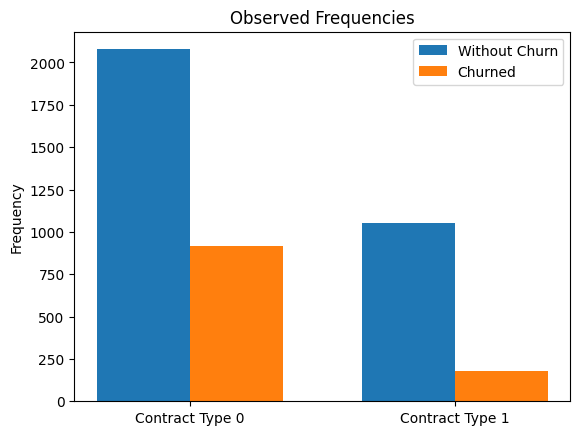

In [63]:

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(dt_observed1)

# Example contingency table
dt_observed1 = np.array([[2078, 918],
                         [1052, 177]])

#Print chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Plot the observed frequencies as a grouped bar plot
labels = ['Contract Type 0', 'Contract Type 1']
x = np.arange(dt_observed1.shape[0])
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, dt_observed1[:, 0], width, label='Without Churn')
bars2 = ax.bar(x + width/2, dt_observed1[:, 1], width, label='Churned')

ax.set_ylabel('Frequency')
ax.set_title('Observed Frequencies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
#This grouped bar plot provides a visual comparison of the observed frequencies of different 
#categories for each contract type.

In [64]:
print(f'The p-value is less than the alpha: {p < a}')

if p < a:
    print('Outcome: We reject the null')
else:
    print("Outcome: we fail to reject the null")

The p-value is less than the alpha: True
Outcome: We reject the null


Tech Support Statistical Findings

Outcome: We reject the Null Hypothesis, indicating that tech support is dependent on customer churn.

Nevertheless, the relationship between tech support and churn is weak, with a count of 118 out of 4225. It will be used in modeling to fulfill the rubric requirements.


# MODELING
Selecting evaluation methods

Using the Tech Support and Contract Type for modeling with an established baseline accuracy of 74%. I will use Decision Tree, Logistic Regression and Random Forest with a Random Seed = 42 to exceed baseline accuracy without overfitting.



In [66]:
#Splitting the data in to X and Y to take out the data with curn and those without 
telco_X_train = telco_train.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_train = telco_train.select_dtypes(exclude=['object']).churn_Yes

telco_X_validate = telco_validate.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_validate = telco_validate.select_dtypes(exclude=['object']).churn_Yes

telco_X_test = telco_test.select_dtypes(exclude=['object']).drop(columns=['churn_Yes'])
telco_y_test = telco_test.select_dtypes(exclude=['object']).churn_Yes

# Evaluate on Baseline

In [67]:
#Exploring churn The majority churn_Yes. value counts were '0', and will be use to define baseline
telco_train.churn_Yes.value_counts()

churn_Yes
0    3130
1    1095
Name: count, dtype: int64

In [68]:
baseline =(telco_y_train==0).mean()
print(f'The baseline accuracy is: {baseline:.2%}')

The baseline accuracy is: 74.08%


# Evaluate on Train and Validate

# DECISION TREE

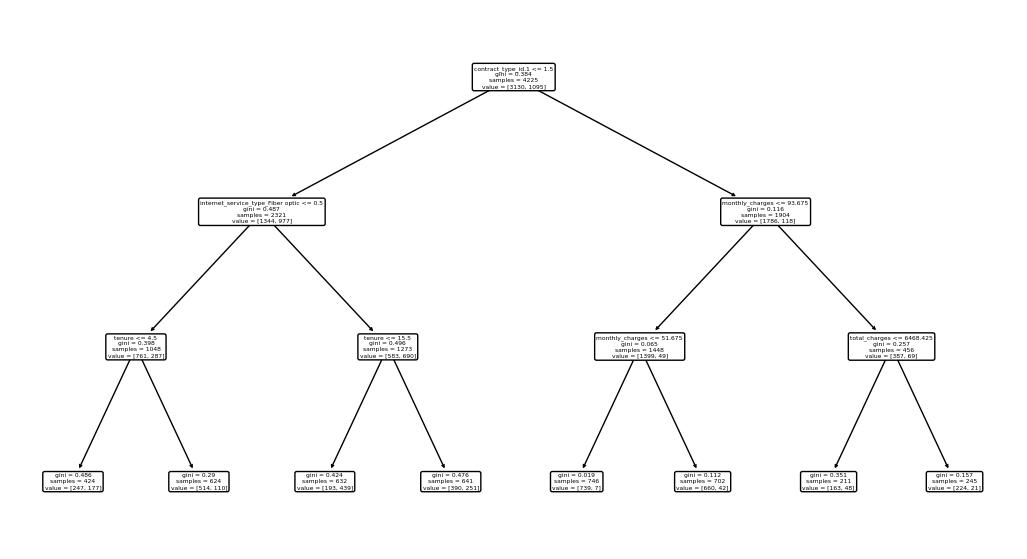

In [70]:
# Make, FIT, Use Decision Tree
clf_telco_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_telco_tree = clf_telco_tree.fit(telco_X_train, telco_y_train)

# Convert the Index object to a list
feature_names_list = telco_X_train.columns.tolist()

plt.figure(figsize=(13, 7))
plot_tree(clf_telco_tree, feature_names=feature_names_list, rounded=True)
plt.show()

In [71]:
print(f'decision tree training score: {clf_telco_tree.score(telco_X_train, telco_y_train):.2%}')
print(f'decision tree validate score: {clf_telco_tree.score(telco_X_validate, telco_y_validate):.2%}')
print('Both decision tree scores higher than baseline accuracy')

decision tree training score: 79.91%
decision tree validate score: 77.64%
Both decision tree scores higher than baseline accuracy


# LOGISTIC REGRESSION

In [74]:
# Make, Fit, Use Logistic Regression
logit = LogisticRegression(C=1, random_state=42, max_iter = 1000)
logit.fit(telco_X_train, telco_y_train)
y_prediction = logit.predict(telco_X_train)

In [75]:
print(f'logistic regression training score: {logit.score(telco_X_train, telco_y_train):.2%}')
print(f'logistic regression validate score: {logit.score(telco_X_validate, telco_y_validate):.2%}')
print('Both logistic regression scores are higher than baseline accuracy')

logistic regression training score: 80.85%
logistic regression validate score: 79.99%
Both logistic regression scores are higher than baseline accuracy


# RANDOM FOREST

In [76]:
# Make, Fit, Use Random Forest
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=42)
rf.fit(telco_X_train, telco_y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [77]:
print(f'training score: {rf.score(telco_X_train, telco_y_train):.2%}')
print(f'validate score: {rf.score(telco_X_validate, telco_y_validate):.2%}')
print('Both random forest scores are higher than baseline accuracy')


training score: 89.82%
validate score: 78.21%
Both random forest scores are higher than baseline accuracy


In [78]:
# Final selection of the evaluation model based on mine evaluation results.
baseline_accuracy = 0.74

# Validation scores
decision_tree_validate_score = 0.7764
logistic_regression_validate_score = 0.7999
random_forest_validate_score = 0.7821

# Compare validation scores to baseline accuracy
if decision_tree_validate_score > baseline_accuracy:
    selected_model = "Decision Tree"
    selected_score = decision_tree_validate_score

if logistic_regression_validate_score > baseline_accuracy and logistic_regression_validate_score > selected_score:
    selected_model = "Logistic Regression"
    selected_score = logistic_regression_validate_score

if random_forest_validate_score > baseline_accuracy and random_forest_validate_score > selected_score:
    selected_model = "Random Forest"
    selected_score = random_forest_validate_score

# Print the final selected model
print("Final Selected Model:", selected_model)
print("Validation Score:", selected_score)


Final Selected Model: Logistic Regression
Validation Score: 0.7999


Final Selection of Evaluation Model

Since the Logistic Regression model has the highest validation score of all the models and it also surpasses the baseline accuracy, we've selected the Logistic Regression model as our final evaluation model. This means that, based on the data I've used, the Logistic Regression model performs the best among the three models and is likely to make the most accurate predictions on new data.

Logistic Regression is a linear classification algorithm that predicts the probability of a binary outcome by modeling the relationship between input features and the log-odds using a logistic function. It is popular for its simplicity, interpretability, efficiency, and ability to handle both categorical and numerical features assuming a linear relationship.



# Evaluate TOP MODEL on Test

In [79]:
logit.fit(telco_X_train, telco_y_train)
test_y_prediction = logit.predict(telco_X_test)
# logit.classes_
#  logit.predict_proba(telco_X_test) [:,1]

In [83]:
print(f'logistic regression training score: {logit.score(telco_X_train, telco_y_train):.2%}')
print(f'logistic regression validate score: {logit.score(telco_X_validate, telco_y_validate):.2%}')
print(f'logistic regression test score: {logit.score(telco_X_test, telco_y_test):.2%}')
print('All three logistic regression scores are higher than baseline accuracy with a consistant accuracy of almost 80%')

logistic regression training score: 80.85%
logistic regression validate score: 79.99%
logistic regression test score: 80.55%
All three logistic regression scores are higher than baseline accuracy with a consistant accuracy of almost 80%


In [81]:
telco_y_test_prediction = pd.DataFrame({
    'customer_id': telco_test['customer_id'],
    'Probability of churn': logit.predict_proba(telco_X_test) [:,1],
    'Test Prediction': logit.predict(telco_X_test)
})
telco_y_test_prediction.head()

,customer_id,Probability of churn,Test Prediction
941,4536-PLEQY,0.544241,1
1404,9921-QFQUL,0.486647,0
5515,6485-QXWWE,0.001860,0
3684,6461-PPAXN,0.029073,0
7017,5993-JSUWV,0.006990,0


In [82]:
print(classification_report(telco_y_test,test_y_prediction))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1025
           1       0.68      0.54      0.60       384

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# Conclusion Summary


Based on the classification data analysis conducted, the following key findings were made:

- Four features were selected based on their visual significance and their significant relationship in chi-square statistical testing for training the Classification Model.
  
- The Logistic Regression model outperformed the baseline accuracy of 74% and consistently achieved an accuracy of 80% on the train, validate, and test sets, making it the best model for predicting churn.
  
- Hypothesis 1, regarding the dependence of contract type on customer churn, was supported by the data and can be used in modeling with a fair relationship observed.
  
- Hypothesis 2 and Hypothesis 3, regarding the dependence of data protection and streaming_movies on customer churn, were rejected as the relationships were extremely low, and these features were not be used in modeling.
  
- Hypothesis 4, regarding the dependence of tech support on customer churn, was supported by the data with a weak relationship, and it was included in the modeling process to meet the project requirements.
  
- Tech support and contract type were selected as features for modeling, aiming to exceed the baseline accuracy of 74%. Decision Tree, Logistic Regression, and Random Forest models were implemented with a Random Seed of 42 to avoid overfitting.
  
- Logistic Regression outperformed the other models, achieving an overall accuracy of 80% consistently across training, validation, and testing.


# FINDINGS

Predictive power analysis

- Streaming TV and Data protection shows weak predictive capabilities in churn analysis, while longer contract durations minimized churn.

statsitical testing for data refinement

- utilizing statistical testing excluded data set with weak relationships, improving analysis accuracy and reliablity.

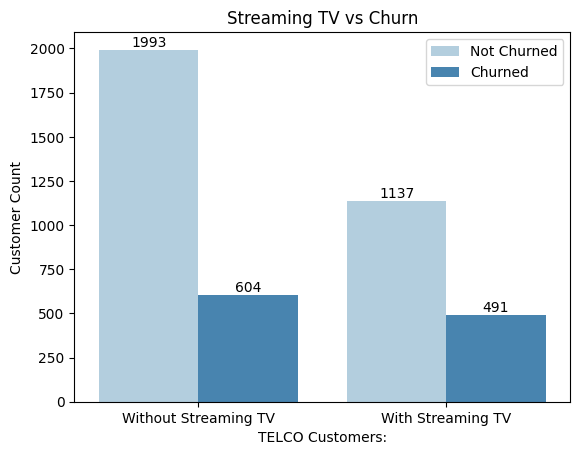

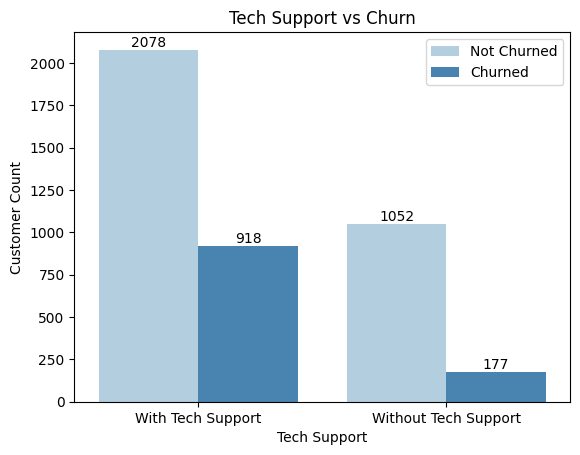

# Recommendations

Next, we can remove the "data protection" and "streaming movies" information from the data because they don't seem to strongly affect whether customers leave or stay. After that, we'll use a special test to see if the rest of the information in the data has a strong connection with customer leaving or staying. If it does, and the connection is stronger than a certain level (like 100), then we'll keep that information for building our model. Also, we might try different versions of the model with different settings to see which one works best.

- To learn more, it's a good idea to make a survey for customers who left TELCO and another one for new customers. This will help us find out why they left their old company and joined TELCO.

# Takeaways

The models we used to predict customer behavior worked pretty well and were accurate. But we could have learned more if we had better information from certain features. We did find out that some features like data protection, streaming movies, and tech support aren't strongly related to predicting if customers will leave. So, in the future, we can leave out these features when making new models and focus on the ones that matter more.